## Project Objective : Building an Regression model(Linear) to predict the Homestay prices of Residential Properties

In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [3]:
df = pd.read_excel("Air_BNB.xlsx")
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [4]:
# dropping ID column as not required
df.drop('id',axis=1,inplace=True)
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [5]:
df.shape

(74111, 10)

In [6]:
df.tail()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.852030


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [8]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [9]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [10]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [11]:
df['room_type'].nunique()

3

In [12]:
df['room_type'].value_counts()

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

In [13]:
list = [1,2,3,4,5]
for i in list:
    print(i**2)

1
4
9
16
25


In [14]:
## checking unique and value counts of all the objects in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df['room_type'].unique())
        print(column.upper(),':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : ['Entire home/apt' 'Private room' 'Shared room' nan]
ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : ['Entire home/apt' 'Private room' 'Shared room' nan]
CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : ['Entire home/apt' 'Private room' 'Shared room' nan]
INSTANT_BOOKABLE : 3

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [15]:
## creating copy 
df_2 = df.copy()

In [16]:
## checking duplicates and drop them
df_2.drop_duplicates(inplace=True)

In [17]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [18]:
## checking null values
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [19]:
df_2.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [20]:
## Null Value Treatment categorical variable 
df_2 = pd.get_dummies(df_2,columns=['room_type','cancellation_policy','instant_bookable'],drop_first=True)

In [21]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,False,False,False,True,True


In [22]:
## imputation of null values- mean
for column in df_2.columns:
    if df_2[column].dtype != 'object':
        mean = df_2[column].mean()
        df_2[column] = df_2[column].fillna(mean) 

In [23]:
df_2.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [24]:
df_mean = df_2

In [25]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,False,False,False,True,True


In [26]:
df_med = df_2.copy()

In [27]:
## imputation of null values- median
for column in df_med.columns:
    if df_med[column].dtype != 'object':
        median = df_2[column].median()
        df_med[column] = df_med[column].fillna(median)

In [28]:
df_med.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [29]:
df_mean.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [30]:
## imputing null values using predictive model - KNN imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # will consider 5 neighbours to predict
df_imputed=imputer.fit_transform(df_2) 
df_knn = pd.DataFrame(data = df_imputed,columns=df_2.columns)

In [31]:
df_knn.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

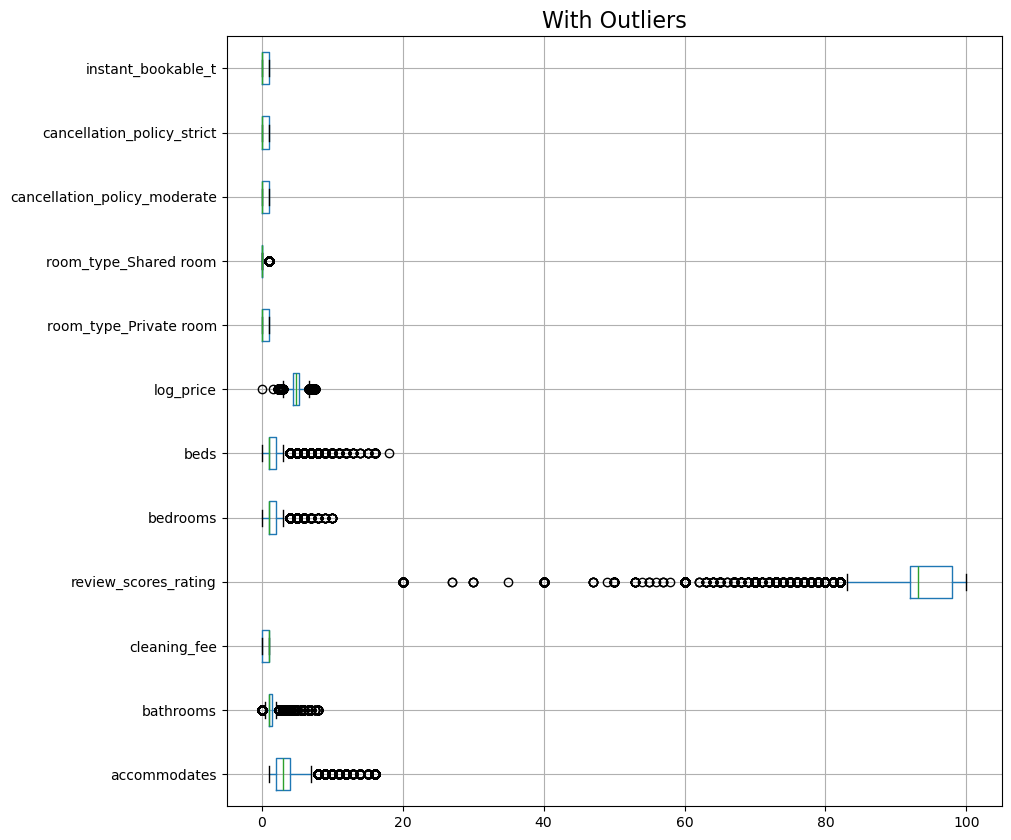

In [32]:
## Outliers Treatment - Knn
cont=df_knn.dtypes[(df_knn.dtypes!='uint8') & (df_knn.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [74]:
## Removing Outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [84]:
## removing outlier for df mean
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [86]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

In [90]:
## Teating outlier for mean
# Iterate only over numeric columns
for column in df_mean_out.select_dtypes(include=np.number).columns:
    
    lr, ur = remove_outlier(df_mean_out[column])
    
    # Replace values greater than upper range with upper range value
    df_mean_out[column] = np.where(df_mean_out[column] > ur, ur, df_mean_out[column])
    
    # Replace values smaller than lower range with lower range value
    df_mean_out[column] = np.where(df_mean_out[column] < lr, lr, df_mean_out[column])


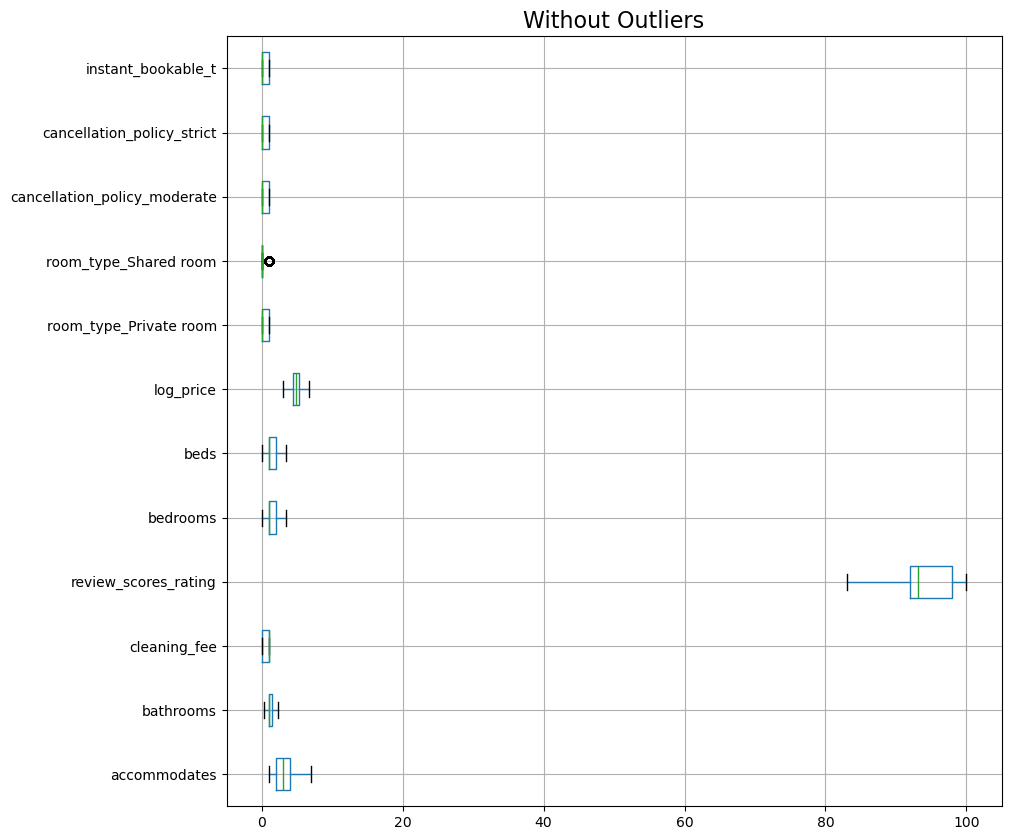

In [98]:
plt.figure(figsize=(10,10))
df_mean_out[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

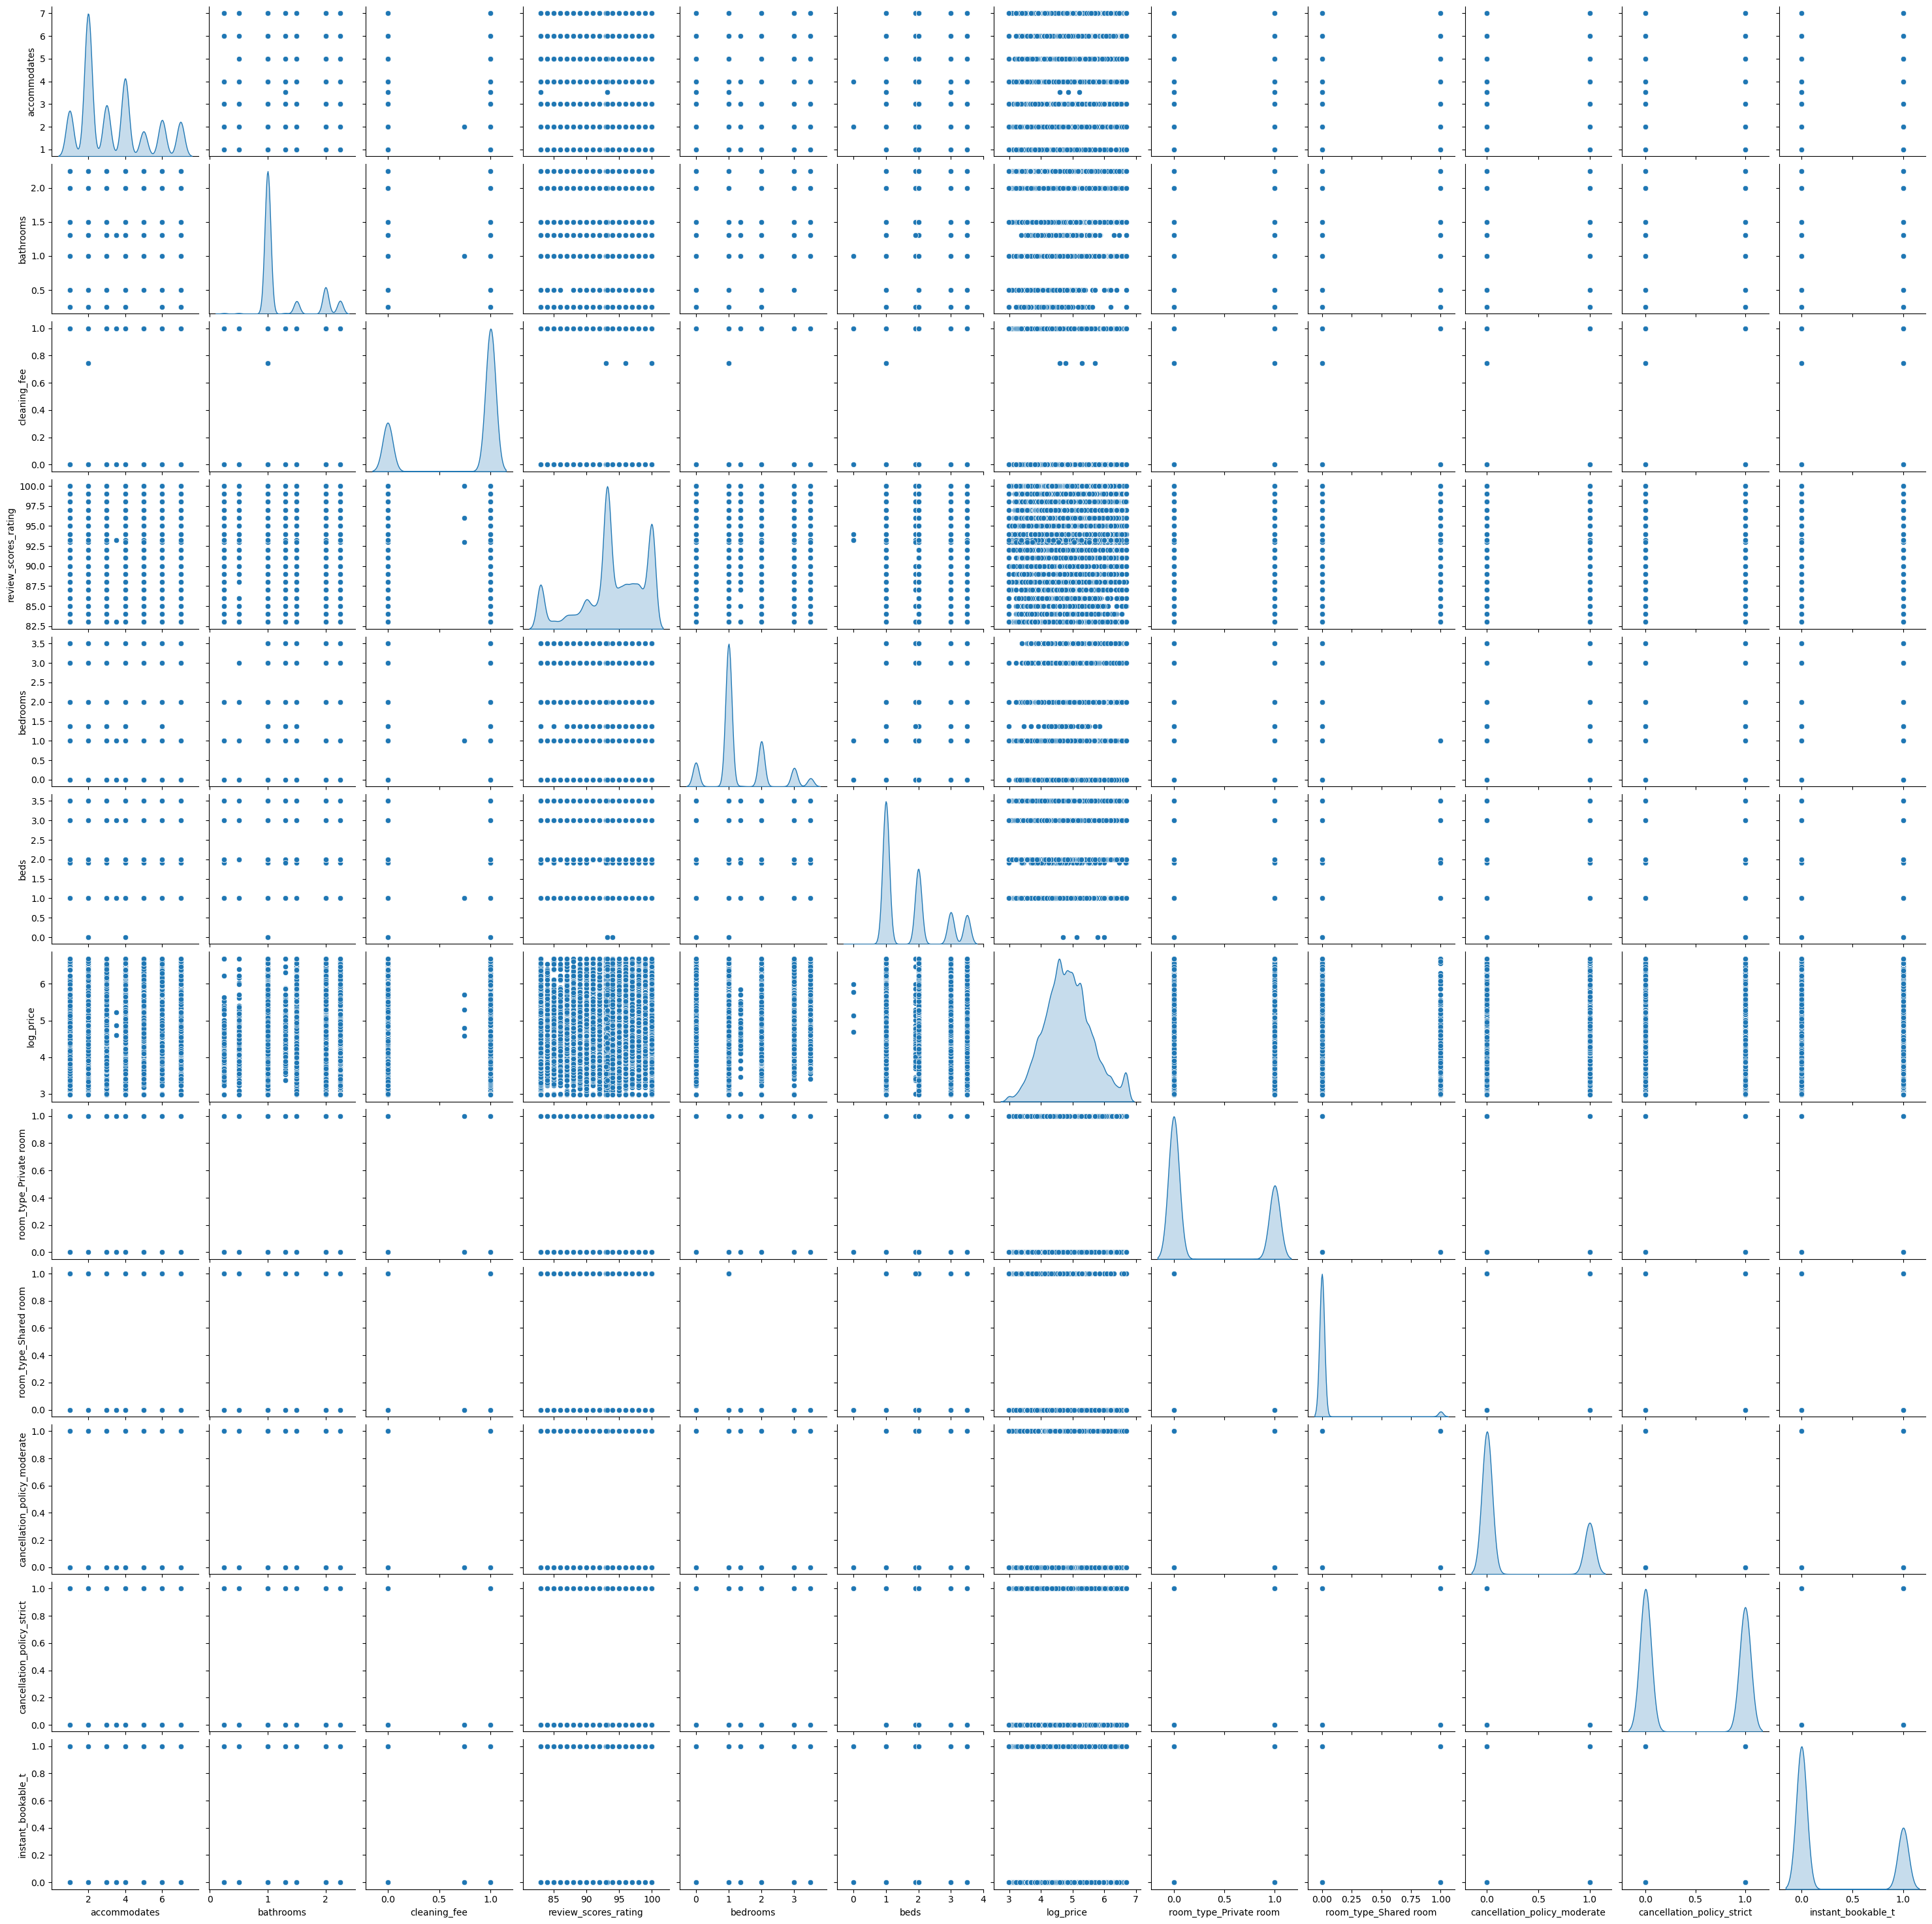

In [100]:
## Data Distribution
sns.pairplot(df_mean_out,diag_kind='kde')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

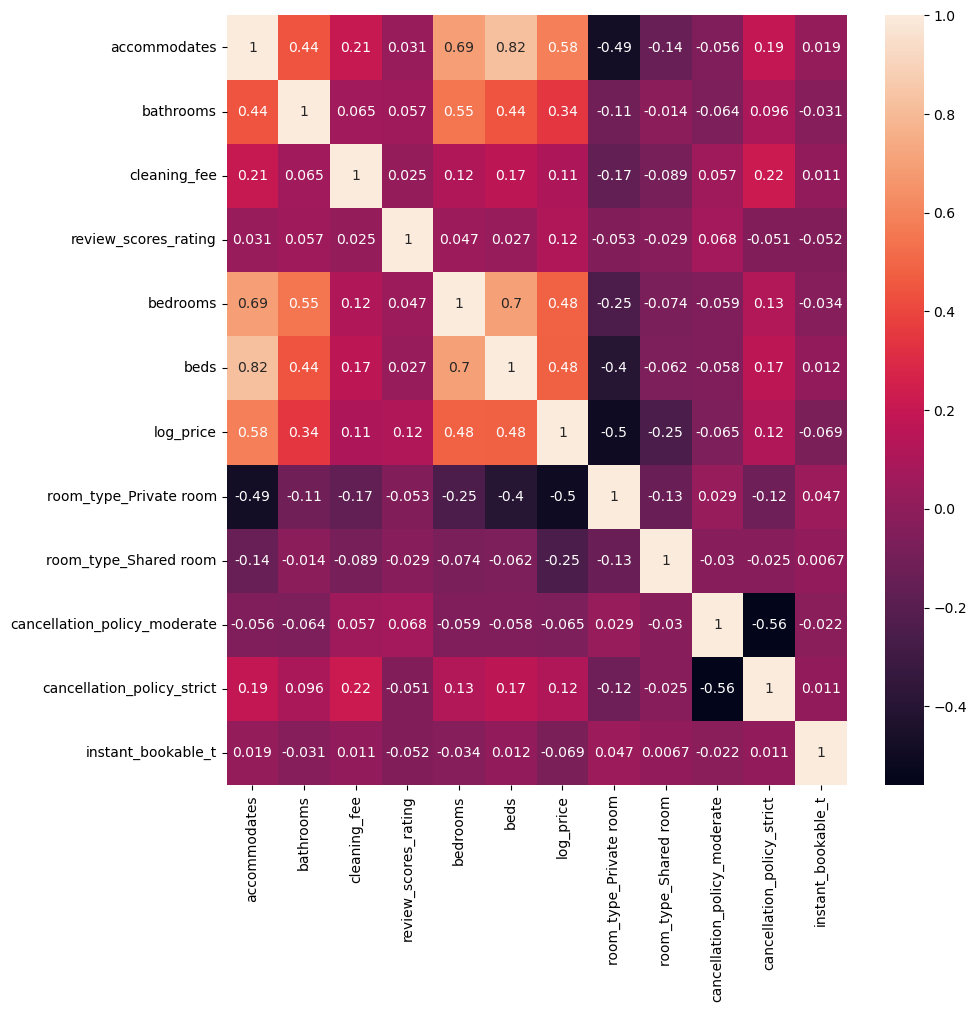

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean_out.corr(),annot=True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

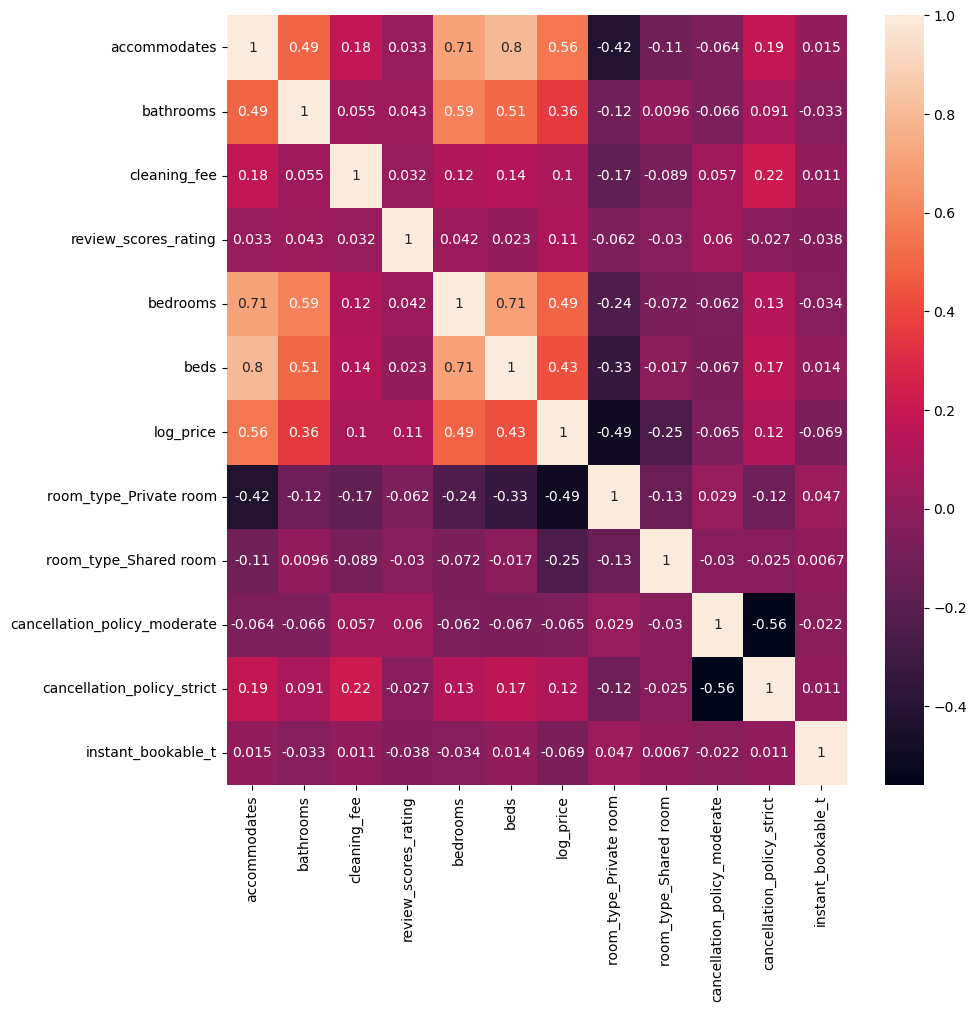

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean.corr(),annot=True)

plt.show

### Train - test split

### Mean Oulier treated

In [116]:
## Train - Test Split
X = df_mean_out.drop('log_price', axis=1) ## removing target variable(log price) (contains all the independent variables)

# Copy target into the y dataframe. 
y = df_mean_out[['log_price']] ## keeping only target variable (is dependent variable)

In [118]:
X.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,False,False,False,True,False
1,7.0,1.0,1.0,93.000000,3.0,3.0,False,False,False,True,True
2,5.0,1.0,1.0,92.000000,1.0,3.0,False,False,True,False,True
3,4.0,1.0,1.0,93.202041,2.0,2.0,False,False,False,False,False
4,2.0,1.0,1.0,83.000000,0.0,1.0,False,False,True,False,True


In [120]:
y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [123]:
## test range split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

## Linear Regression model

In [126]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [128]:
regression_model.score(X_train, y_train)

0.5050812146830725

### Mean outlier not treated

In [143]:
## Train - Test Split
X = df_mean.drop('log_price', axis=1) ## removing target variable(log price) (contains all the independent variables)

# Copy target into the y dataframe. 
y = df_mean[['log_price']] ## keeping only target variable (is dependent variable)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [147]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [149]:
regression_model.score(X_train, y_train)

0.5026453886994027

### Median oulier treated

In [185]:
for column in df_med_out.select_dtypes(include=np.number).columns:
    
    lr, ur = remove_outlier(df_med_out[column])
    
    # Replace values greater than upper range with upper range value
    df_med_out[column] = np.where(df_med_out[column] > ur, ur, df_med_out[column])
    
    # Replace values smaller than lower range with lower range value
    df_med_out[column] = np.where(df_med_out[column] < lr, lr, df_med_out[column])

In [187]:
X = df_med_out.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_med_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.5050812146830725

### Median oulier not treated

In [172]:
X = df_med.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_med[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.5026453886994027

### Knn outlier treated 

In [198]:
for column in df_knn_out.select_dtypes(include=np.number).columns:
    
    lr, ur = remove_outlier(df_knn_out[column])
    
    # Replace values greater than upper range with upper range value
    df_knn_out[column] = np.where(df_knn_out[column] > ur, ur, df_knn_out[column])
    
    # Replace values smaller than lower range with lower range value
    df_knn_out[column] = np.where(df_knn_out[column] < lr, lr, df_knn_out[column])

In [200]:
X = df_knn_out.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_knn_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.44534054044857874

### Knn outlier not treated 

In [183]:
X = df_knn.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_knn[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.5026453886994027

In [202]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,False,False,False,True,True


In [204]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,83.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,7.0,1.0,1.0,100.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,93.202041,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.499810


In [230]:
# Replace spaces with underscores in column names
data_train.columns = data_train.columns.str.replace(' ', '_')

# Now you can safely use the column names in your formula
expr = 'log_price ~ accommodates + bathrooms + instant_bookable_t + review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee'

In [232]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.278186e+00
accommodates                    1.375298e-01
bathrooms                       1.594734e-01
instant_bookable_t             -7.258914e-02
review_scores_rating            1.162902e-02
bedrooms                        1.498388e-01
beds                           -6.690067e-02
room_type_Private_room         -5.002901e-01
room_type_Shared_room           2.351484e-17
cancellation_policy_moderate   -5.352626e-02
cancellation_policy_strict     -4.551083e-03
cleaning_fee                   -5.647658e-02
dtype: float64

In [234]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.1375297726302741
The coefficient for bathrooms is 0.1594734262503626
The coefficient for cleaning_fee is -0.05647657714766251
The coefficient for review_scores_rating is 0.01162902315704356
The coefficient for bedrooms is 0.14983880960357393
The coefficient for beds is -0.06690067078108587
The coefficient for room_type_Private room is -0.5002900548345635
The coefficient for room_type_Shared room is 3.8163916471489756e-17
The coefficient for cancellation_policy_moderate is -0.05352626291353685
The coefficient for cancellation_policy_strict is -0.0045510834664249265
The coefficient for instant_bookable_t is -0.07258913804341799


In [236]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.278186399778897
